# Fake News Detection

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re              
import string

# importing datasets

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


### Inserting class as a 'target' feature

In [5]:
df_fake["class"] = 0
df_true["class"] = 1

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470, -1):
    df_fake.drop([i], axis=0, inplace=True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406, -1):
    df_true.drop([i], axis=0, inplace=True)

In [8]:
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis=0)
df_manual_testing.to_csv("manual_testing.csv")


In [9]:
df_merge = pd.concat([df_fake, df_true], axis=0)
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


### Count of fake news and true news

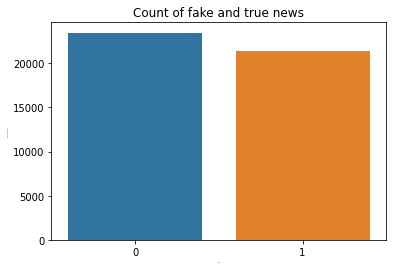

In [10]:
ax=sns.countplot(x="class", data= df_merge)

#Setting labels and font size
ax.set(xlabel='class', ylabel='Count of fake/true',title='Count of fake and true news')
ax.xaxis.get_label().set_fontsize(0)
ax.yaxis.get_label().set_fontsize(0)

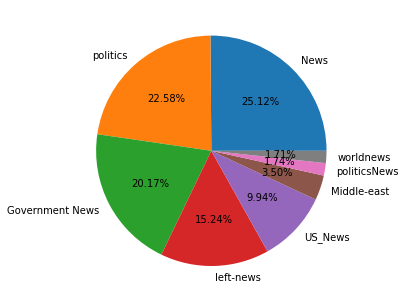

In [11]:
##data visualization
from matplotlib import pyplot as plt
import seaborn as sns
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(df_merge.subject.value_counts(), labels = df_merge.subject.unique(),autopct='%1.2f%%')
plt.show()

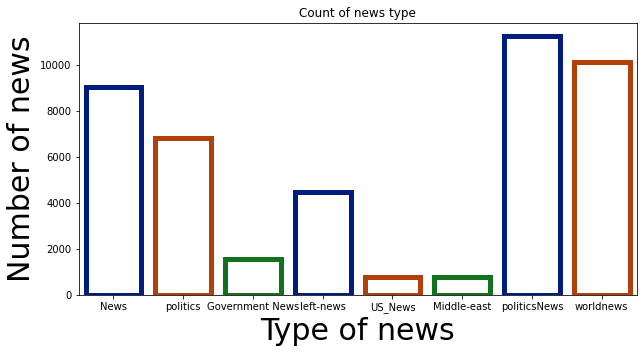

In [12]:
#Plotting the frequency plot
plt.figure(figsize=(10,5))
ax = sns.countplot(x="subject", data=df_merge,
                   facecolor=(0, 0, 0, 0),
                    linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

#Setting labels and font size
ax.set(xlabel='Type of news', ylabel='Number of news',title='Count of news type')
ax.xaxis.get_label().set_fontsize(30)
ax.yaxis.get_label().set_fontsize(30)


#sns.countplot("subject", data=df_merge)
#plt.show()

In [13]:
df = df_merge.drop(["title", "subject", "date"], axis=1)
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


Text(0, 0.5, 'Count')

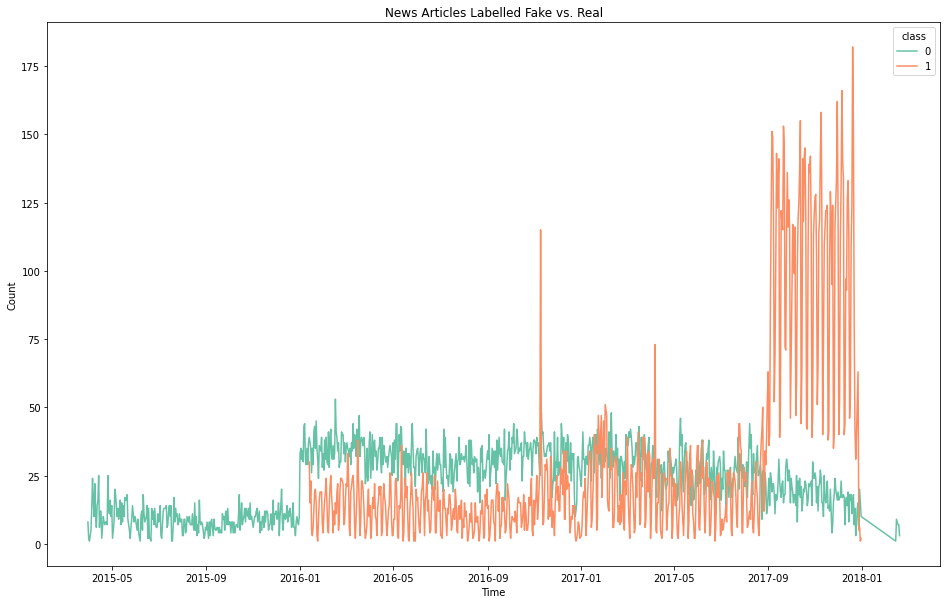

In [14]:
df_merge.date = pd.to_datetime(df_merge.date, errors="coerce")
news_grouped = df_merge[["date", "subject", "class"]].groupby(["date", "class"]).count().reset_index()
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="date", y="subject", hue="class", data=news_grouped, palette="Set2", ax=ax)
plt.title("News Articles Labelled Fake vs. Real")
plt.xlabel("Time")
plt.ylabel("Count")

In [15]:
df = df.sample(frac=1)

In [16]:
df.head(10)

,text,class
9134,Who knew that members of a presidential admini...,0
5175,"On Monday night, Kenneth Walker received a let...",0
2365,WASHINGTON (Reuters) - The U.S. Senate on Tues...,1
5218,(Reuters) - Highlights of the day for U.S. Pre...,1
7990,BOSTON (Reuters) - The Washington Post on Wedn...,1
1367,WASHINGTON/NEW YORK (Reuters) - President Dona...,1
3237,WASHINGTON (Reuters) - U.S. Defense Secretary ...,1
2400,In yet another example of the rash of hate cri...,0
22242,21st Century Wire says Our weekly documentary ...,0
2274,WASHINGTON (Reuters) - U.S. Vice President Mik...,1


In [17]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [18]:
reuters = df[df['text'].str.contains("Reuters")]
reuters.head()

,text,class
2365,WASHINGTON (Reuters) - The U.S. Senate on Tues...,1
5218,(Reuters) - Highlights of the day for U.S. Pre...,1
7990,BOSTON (Reuters) - The Washington Post on Wedn...,1
1367,WASHINGTON/NEW YORK (Reuters) - President Dona...,1
3237,WASHINGTON (Reuters) - U.S. Defense Secretary ...,1


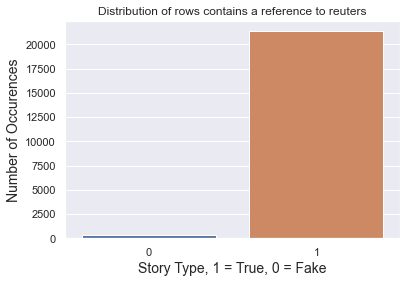

In [19]:
value_counts = reuters["class"].value_counts()
sns.set(style='darkgrid')
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title("Distribution of rows contains a reference to reuters")
plt.ylabel('Number of Occurences', fontsize=14 )
plt.xlabel('Story Type, 1 = True, 0 = Fake', fontsize=14)
plt.show()

In [20]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+','', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\W*','', text)
    return text

In [21]:
df["text"] = df["text"].apply(word_drop)

In [22]:
df.head(10)

,text,class
9134,who knew that members of a presidential admini...,0
5175,on monday night kenneth walker received a let...,0
2365,washington reuters the u s senate on tues...,1
5218,reuters highlights of the day for u s pre...,1
7990,boston reuters the washington post on wedn...,1
1367,washington new york reuters president dona...,1
3237,washington reuters u s defense secretary ...,1
2400,in yet another example of the rash of hate cri...,0
22242,st century wire says our weekly documentary fi...,0
2274,washington reuters u s vice president mik...,1


In [23]:
x = df["text"]
y = df["class"]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .25)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


#### Logistic Regression


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

In [28]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [29]:
LR.score(xv_test, y_test)

0.9877005347593583

In [30]:
pred_LR = LR.predict(xv_test)

In [31]:
print("Accuracy of Logistic Regression Classifier: {}%".format(round(accuracy_score(y_test, pred_LR)*100,2)))

Accuracy of Logistic Regression Classifier: 98.77%


In [32]:
print("\nConfusion Matrix of Logistic Regression Classifier:\n")
print(confusion_matrix(y_test, pred_LR))




Confusion Matrix of Logistic Regression Classifier:

[[5720   68]
 [  70 5362]]


In [33]:
print("\nConfusion Matrix of Logistic Regression Classifier:\n")
pd.DataFrame(
    confusion_matrix(y_test, pred_LR), 
    index = [['actual', 'actual'], ['fake', 'true']], 
    columns = [['predicted', 'predicted'], ['fake', 'true']])



Confusion Matrix of Logistic Regression Classifier:



predicted      
                 fake  true
actual fake      5720    68
       true        70  5362

In [34]:
print("\nClassification Report of Logistic Regression Classifier:\n")
print(classification_report(y_test, pred_LR))


Classification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5788
           1       0.99      0.99      0.99      5432

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



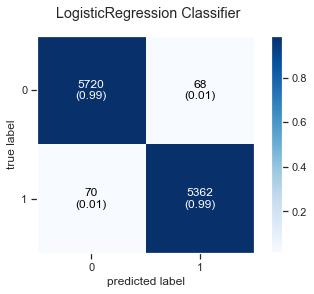

In [35]:
import sklearn.metrics as metrics   
from mlxtend.plotting import plot_confusion_matrix
cm = metrics.confusion_matrix(y_test, pred_LR, labels=[0,1])
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, pred_LR),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.suptitle('LogisticRegression Classifier')
plt.show()


### support vector machine

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

In [37]:
pipe2 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LinearSVC())])

In [38]:
model_svc = pipe2.fit(x_train, y_train)
svc_pred = model_svc.predict(x_test)

In [39]:
print("Accuracy of SVM Classifier: {}%".format(round(accuracy_score(y_test, svc_pred)*100,2)))
print("\nConfusion Matrix of SVM Classifier:\n")
print(confusion_matrix(y_test, svc_pred))
print("\nClassification Report of SVM Classifier:\n")
print(classification_report(y_test, svc_pred))


Accuracy of SVM Classifier: 99.45%

Confusion Matrix of SVM Classifier:

[[5757   31]
 [  31 5401]]

Classification Report of SVM Classifier:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5788
           1       0.99      0.99      0.99      5432

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [40]:
print("\nConfusion Matrix of Support Vector Machine Classifier:\n")
pd.DataFrame(
    confusion_matrix(y_test, svc_pred), 
    index = [['actual', 'actual'], ['fake', 'true']], 
    columns = [['predicted', 'predicted'], ['fake', 'true']])


Confusion Matrix of Support Vector Machine Classifier:



predicted      
                 fake  true
actual fake      5757    31
       true        31  5401

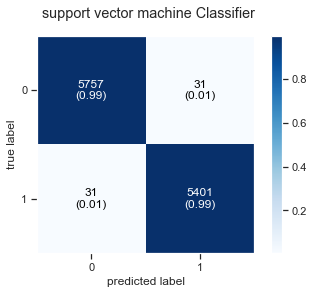

In [41]:
from mlxtend.plotting import plot_confusion_matrix
cm = metrics.confusion_matrix(y_test, pred_LR, labels=[0,1])
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, svc_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.suptitle('support vector machine Classifier')
plt.show()

# Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

In [43]:
pipe3 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', MultinomialNB())])

model_nb = pipe3.fit(x_train, y_train)
nb_pred = model_nb.predict(x_test)

print("Accuracy of Naive Bayes Classifier: {}%".format(round(accuracy_score(y_test, nb_pred)*100,2)))
print("\nConfusion Matrix of Naive Bayes Classifier:\n")
print(confusion_matrix(y_test, nb_pred))
print("\nClassification Report of Naive Bayes Classifier:\n")
print(classification_report(y_test, nb_pred))


Accuracy of Naive Bayes Classifier: 93.76%

Confusion Matrix of Naive Bayes Classifier:

[[5524  264]
 [ 436 4996]]

Classification Report of Naive Bayes Classifier:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5788
           1       0.95      0.92      0.93      5432

    accuracy                           0.94     11220
   macro avg       0.94      0.94      0.94     11220
weighted avg       0.94      0.94      0.94     11220



In [44]:
print("\nConfusion Matrix of Naive Bayes Classifier:\n")
pd.DataFrame(
    confusion_matrix(y_test, nb_pred), 
    index = [['actual', 'actual'], ['fake', 'true']], 
    columns = [['predicted', 'predicted'], ['fake', 'true']])


Confusion Matrix of Naive Bayes Classifier:



predicted      
                 fake  true
actual fake      5524   264
       true       436  4996

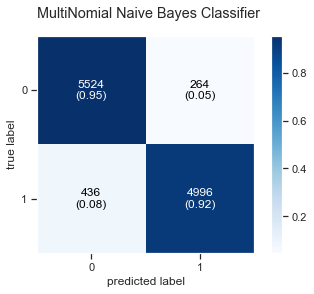

In [45]:
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix

cm = metrics.confusion_matrix(y_test, nb_pred, labels=[0,1])
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, nb_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.suptitle('MultiNomial Naive Bayes Classifier')
plt.show()

In [46]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "True News"
    
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(word_drop) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    svc_pred= model_svc.predict(new_x_test)
    nb_pred= model_nb.predict(new_x_test)
    return print("\n\nLR Prediction: {} \nsvm Prediction: {} \nnaive bayes Prediction: {}".format(output_label(pred_LR[0]),output_label(svc_pred[0]),output_label(nb_pred[0])))

In [47]:
news = input("News Here:-    ")
manual_testing(news)

News Here:-    SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge â€œmuch moreâ€ to ship packages for Amazon (AMZN.O), picking another fight with an online retail giant he has criticized in the past.     â€œWhy is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE!â€ Trump wrote on Twitter.  The presidentâ€™s tweet drew fresh attention to the fragile finances of the Postal Service at a time when tens of millions of parcels have just been shipped all over the country for the holiday season.  The U.S. Postal Service, which runs at a big loss, is an independent agency within the federal government and does not receive tax dollars for operating expenses, according to its website.  Package delivery has become an increasingly important part of its b

In [48]:
# Voting Classifier - Multiple Model Ensemble 
from sklearn.ensemble import VotingClassifier
LR = LogisticRegression()
pipe2 = LinearSVC()
pipe3 = MultinomialNB()


In [49]:
evc = VotingClassifier( estimators= [('lr',LR),('svm',pipe2),('nb',pipe3)], voting = 'hard')

In [50]:
evc.fit(xv_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()), ('svm', LinearSVC()),
                             ('nb', MultinomialNB())])

In [51]:
evc.score(xv_test, y_test)

0.9892156862745098

In [52]:
pred_evc = evc.predict(xv_test)

In [53]:
print("Accuracy of the final voting classifier: {}%".format(round(accuracy_score(y_test, pred_evc)*100,2)))

Accuracy of the final voting classifier: 98.92%


In [54]:
import joblib 

In [55]:
joblib.dump(evc , 'model.pkl')

['model.pkl']

In [56]:
model = joblib.load('model.pkl')